Mounted at /content/drive
Accuracy: 0.42857142857142855
              precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.25      0.50      0.33         2

    accuracy                           0.43         7
   macro avg       0.46      0.45      0.42         7
weighted avg       0.55      0.43      0.45         7



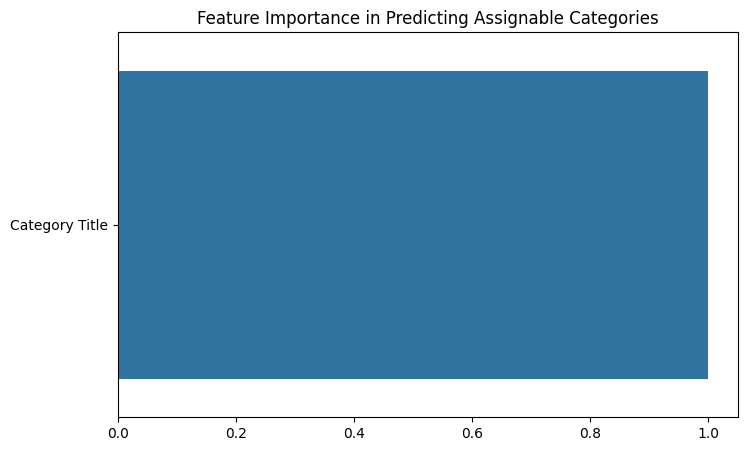

Model and scaler saved to Google Drive!


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load dataset from Google Drive
dataset_path = "/content/drive/My Drive/youtube_categories.csv"  # Update with the correct path
youtube_df = pd.read_csv(dataset_path)

# Display first few rows
youtube_df.head()

# Drop unnecessary columns
youtube_df = youtube_df[['Category ID', 'Category Title', 'Assignable']]

# Encode categorical variables
le = LabelEncoder()
youtube_df['Category Title'] = le.fit_transform(youtube_df['Category Title'])

# Define features and target
X = youtube_df[['Category Title']]
y = youtube_df['Assignable'].astype(int)  # Convert boolean to int

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

# Visualization: Feature Importance
feature_importance = model.feature_importances_
features = ['Category Title']
plt.figure(figsize=(8,5))
sns.barplot(x=feature_importance, y=features)
plt.title("Feature Importance in Predicting Assignable Categories")
plt.show()

# Save model and scaler for reuse
with open("/content/drive/My Drive/model.pkl", "wb") as f:
    pickle.dump(model, f)
with open("/content/drive/My Drive/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("Model and scaler saved to Google Drive!")
